# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [105]:
data=pd.read_csv('df.csv')
data

,Unnamed: 0.1,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,2,2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,3,3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,4,4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,5,5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4904,5106,5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4905,5107,5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4906,5108,5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Memahami Struktur Data**

In [106]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000,4908.000000
mean,2573.384882,2573.384882,0.409739,42.868810,0.091891,0.049511,0.652812,2.170130,0.507335,105.297402,28.89456,1.375509,0.042584
std,1470.873983,1470.873983,0.491836,22.556128,0.288901,0.216954,0.476125,1.092701,0.499997,44.425550,7.85432,1.067417,0.201937
min,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,1294.750000,1294.750000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.067500,23.50000,0.000000,0.000000
50%,2577.500000,2577.500000,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.10000,2.000000,0.000000
75%,3851.250000,3851.250000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.495000,33.10000,2.000000,0.000000
max,5109.000000,5109.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.60000,3.000000,1.000000


**Menangani Data yang Hilang**

In [107]:
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       4908 non-null   int64  
 1   Unnamed: 0         4908 non-null   int64  
 2   gender             4908 non-null   int64  
 3   age                4908 non-null   float64
 4   hypertension       4908 non-null   int64  
 5   heart_disease      4908 non-null   int64  
 6   ever_married       4908 non-null   int64  
 7   work_type          4908 non-null   int64  
 8   Residence_type     4908 non-null   int64  
 9   avg_glucose_level  4908 non-null   float64
 10  bmi                4908 non-null   float64
 11  smoking_status     4908 non-null   int64  
 12  stroke             4908 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 498.6 KB


**Analisis Distribusi dan Korelasi**

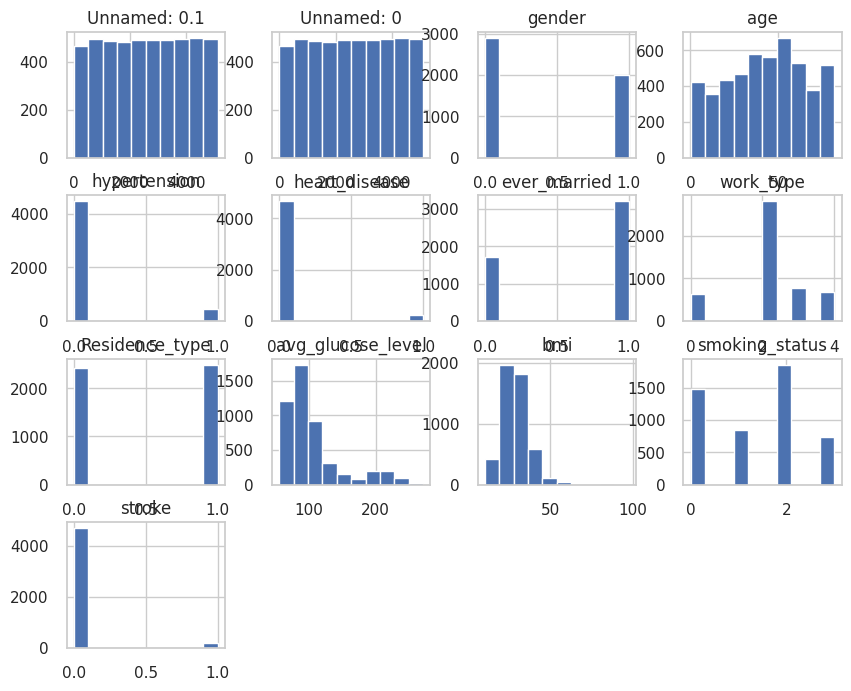

In [109]:
data.hist(figsize=(10,8))
plt.show()

In [110]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

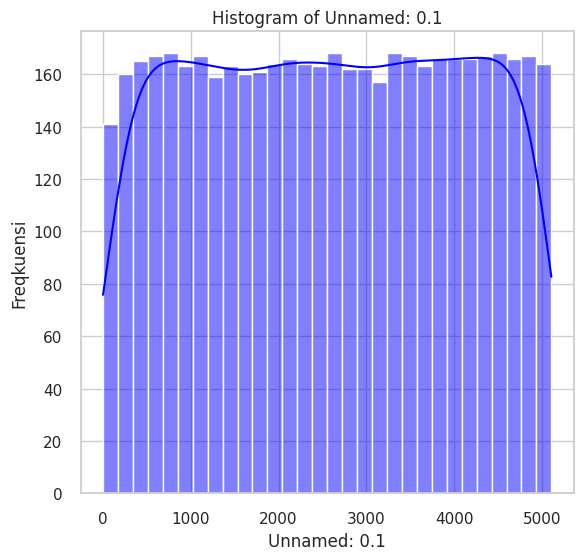

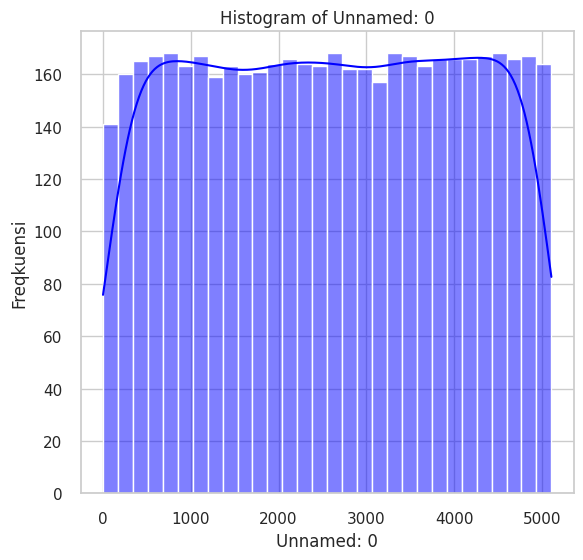

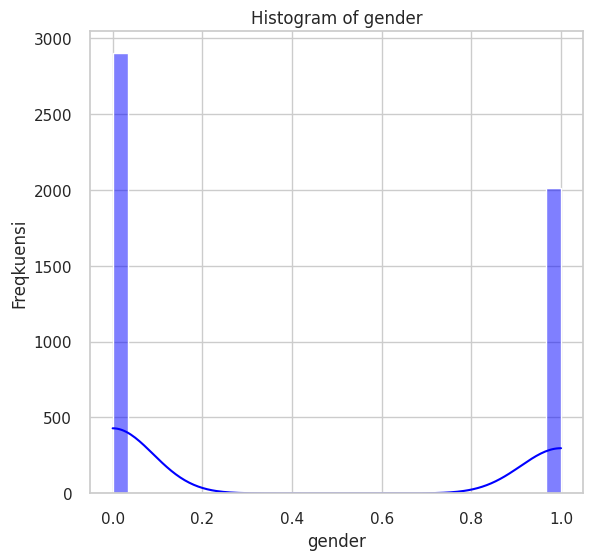

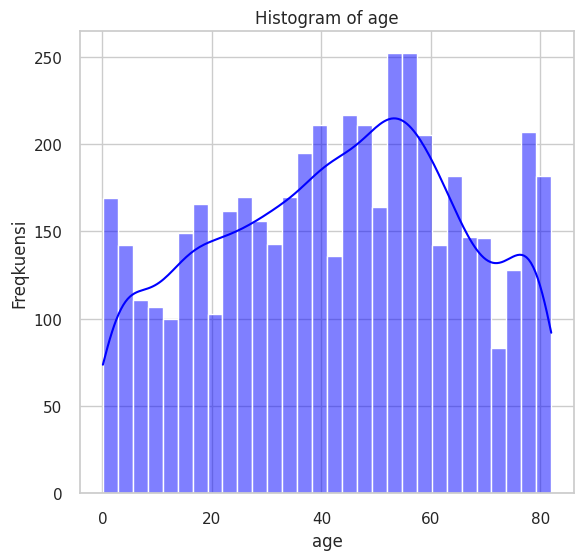

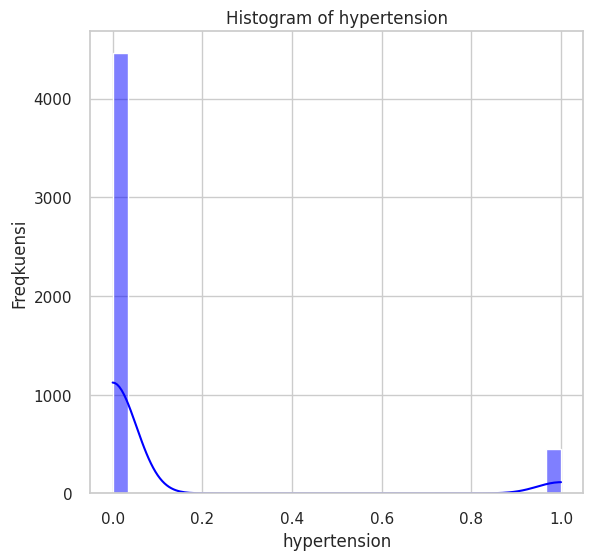

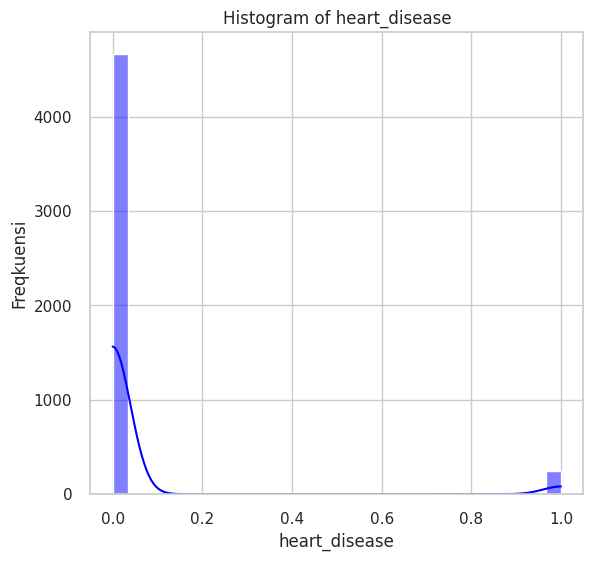

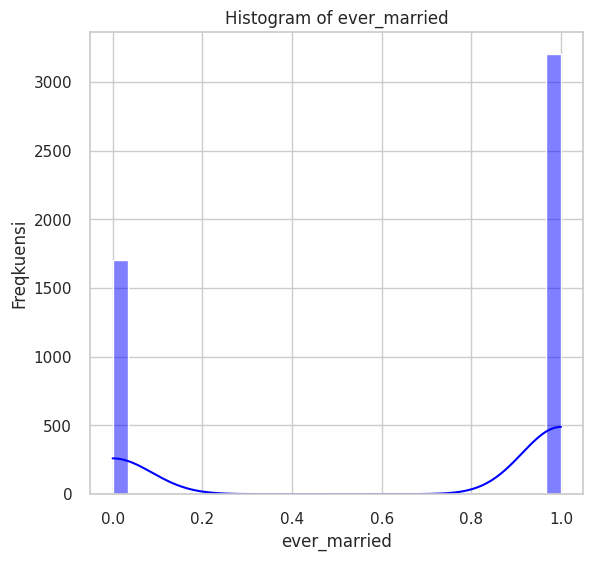

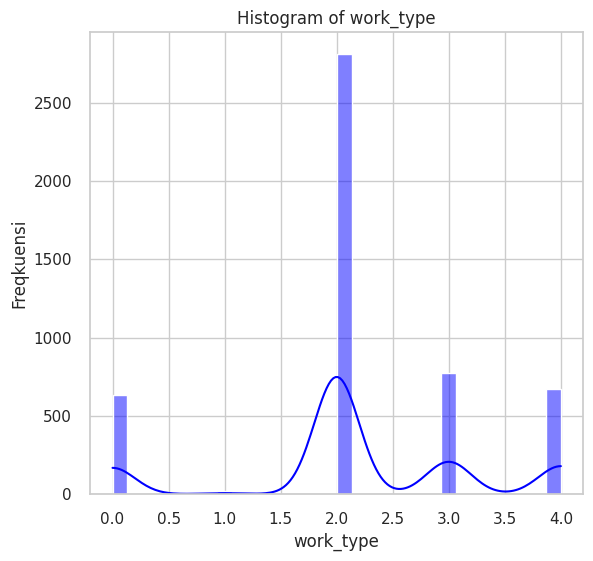

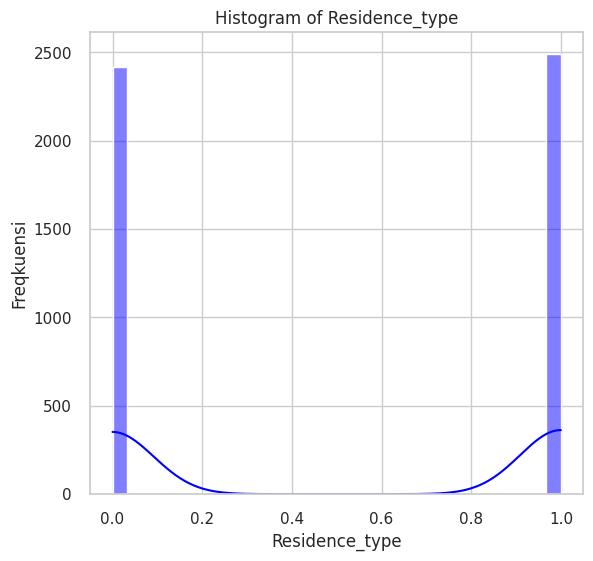

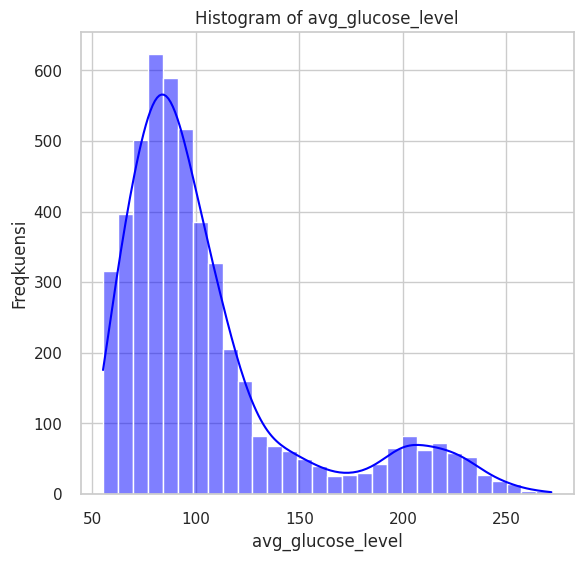

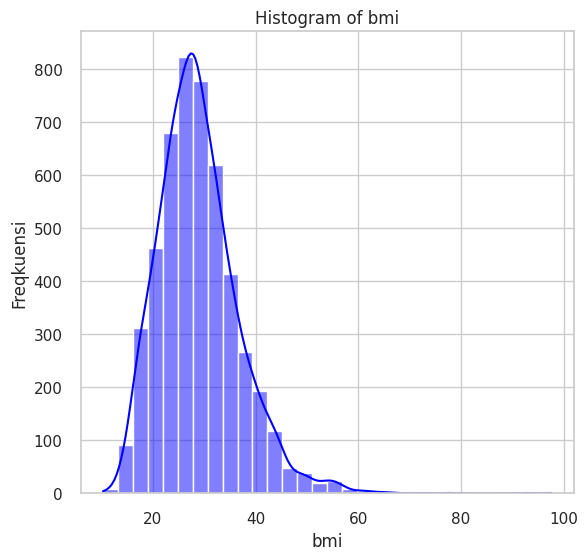

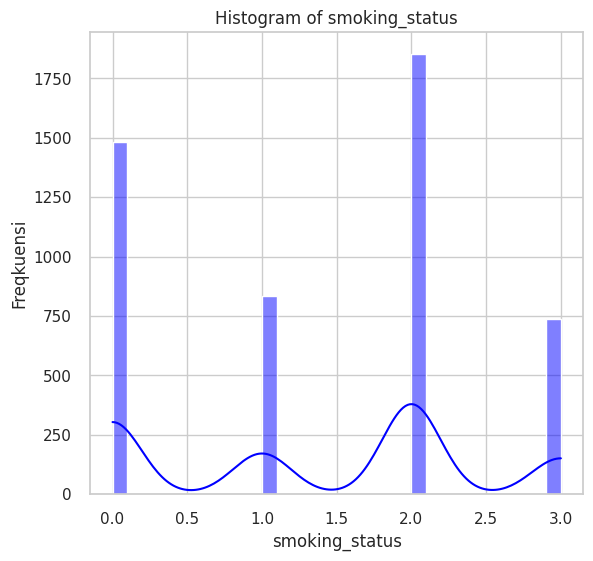

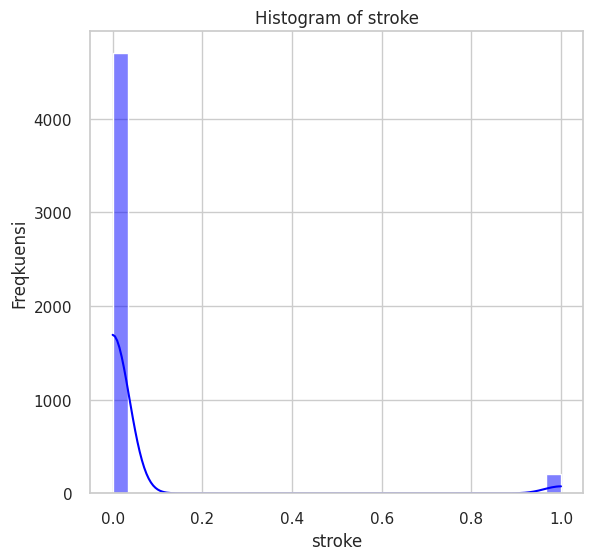

In [111]:
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True,bins=30,color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Freqkuensi')

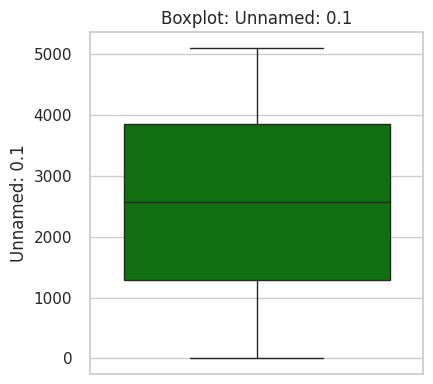

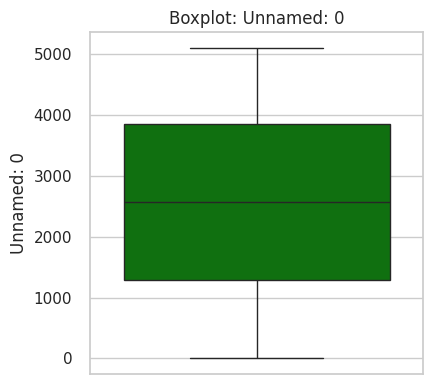

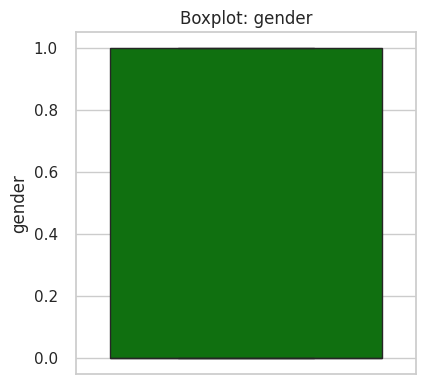

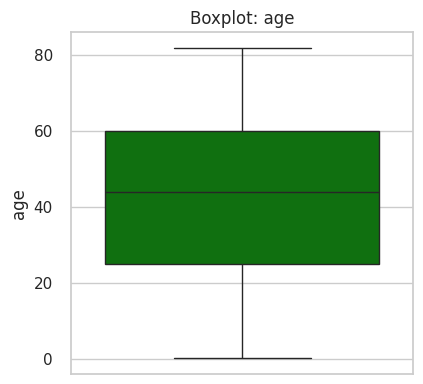

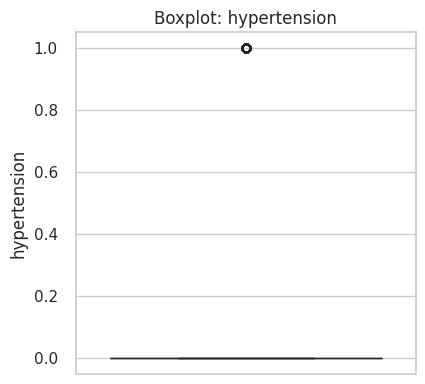

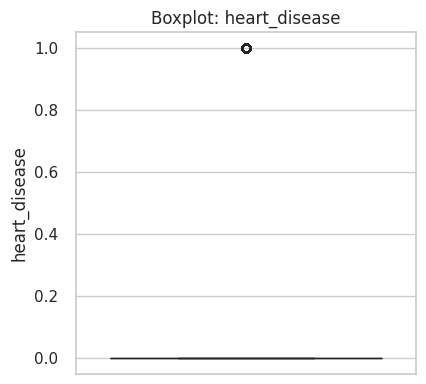

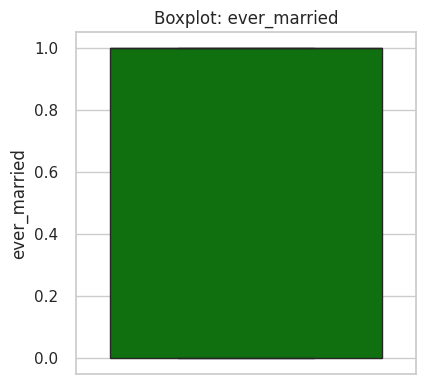

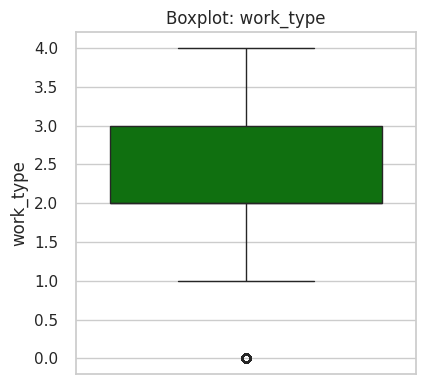

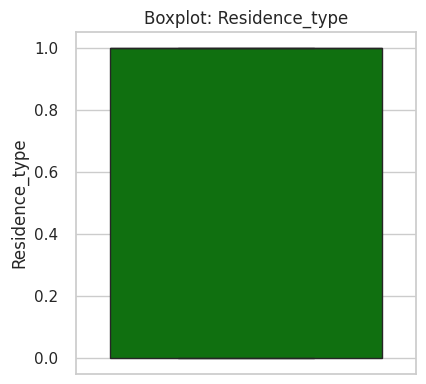

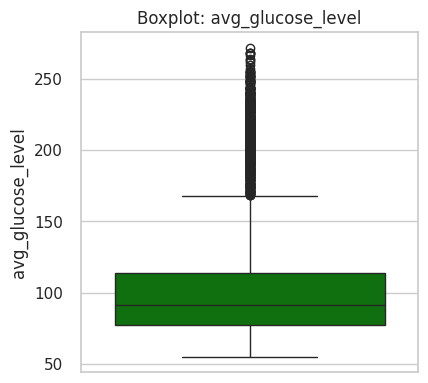

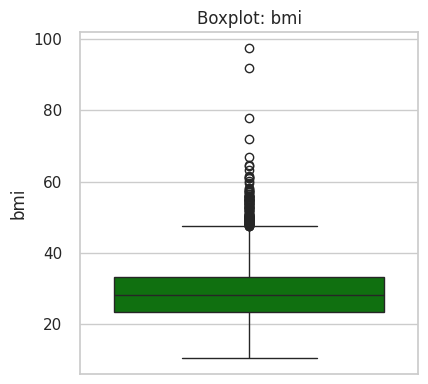

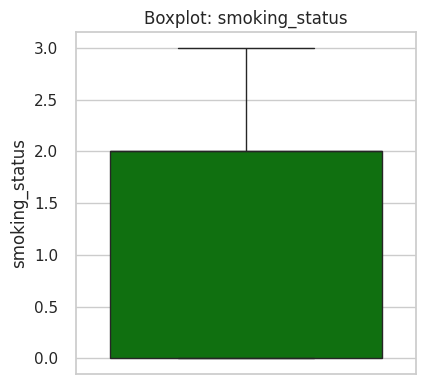

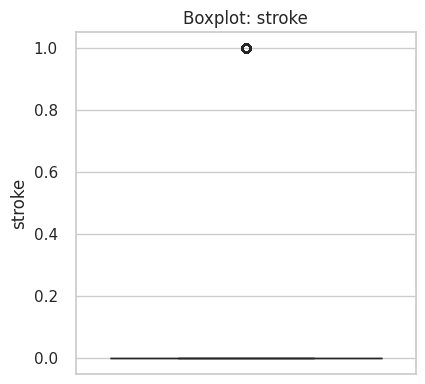

In [112]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column], color='green')
    plt.title(f"Boxplot: {column}")
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

**Visualisasi Data**

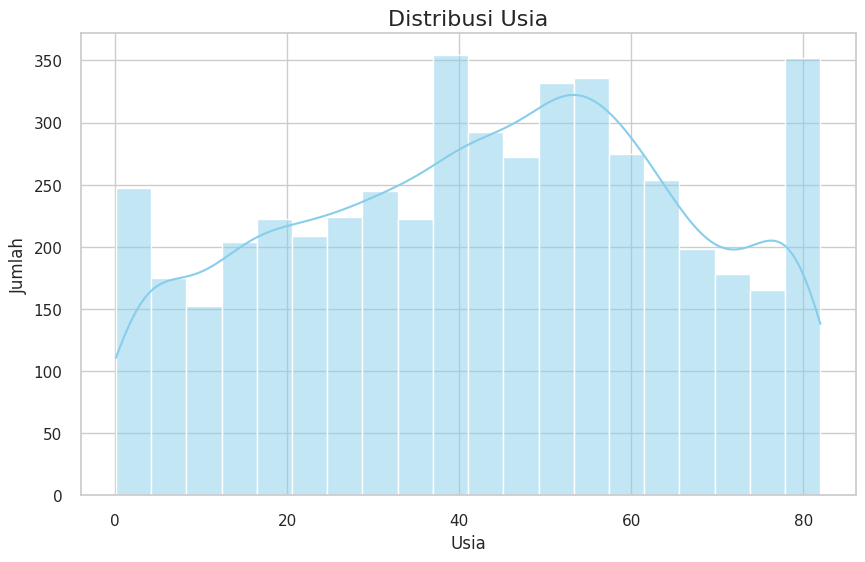

<ipython-input-113-bf261246ab62>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='viridis')


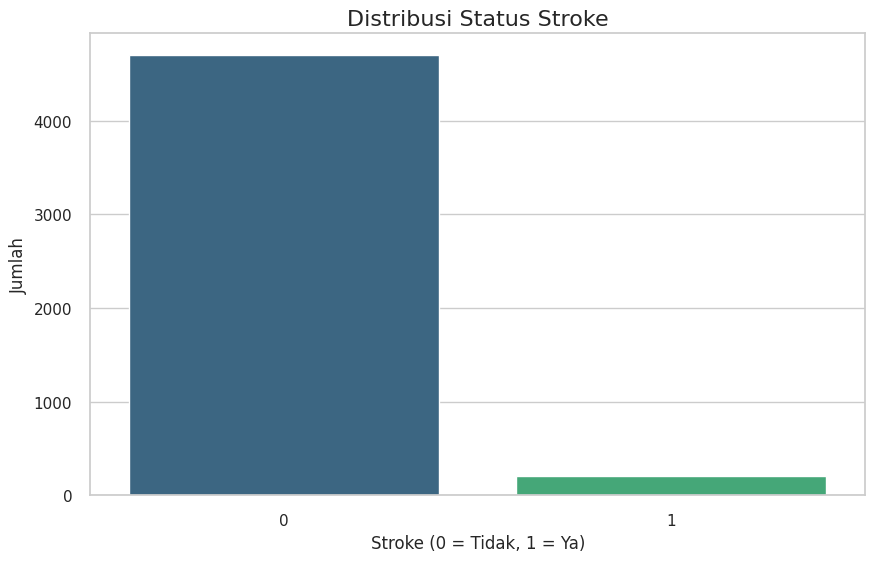

<ipython-input-113-bf261246ab62>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_work_types.index, y=top_work_types.values, palette='coolwarm')


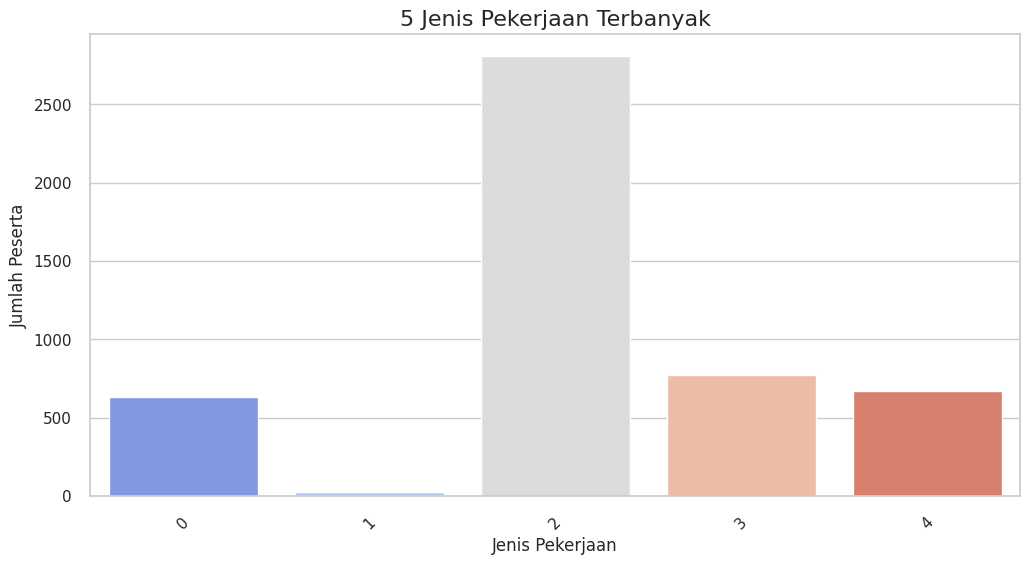

In [113]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Usia', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
stroke_counts = data['stroke'].value_counts()
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='viridis')
plt.title('Distribusi Status Stroke', fontsize=16)
plt.xlabel('Stroke (0 = Tidak, 1 = Ya)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
top_work_types = data['work_type'].value_counts().head(5)
sns.barplot(x=top_work_types.index, y=top_work_types.values, palette='coolwarm')
plt.title('5 Jenis Pekerjaan Terbanyak', fontsize=16)
plt.xlabel('Jenis Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Peserta', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [114]:
correlation_matrix = data[numerical_columns].corr()

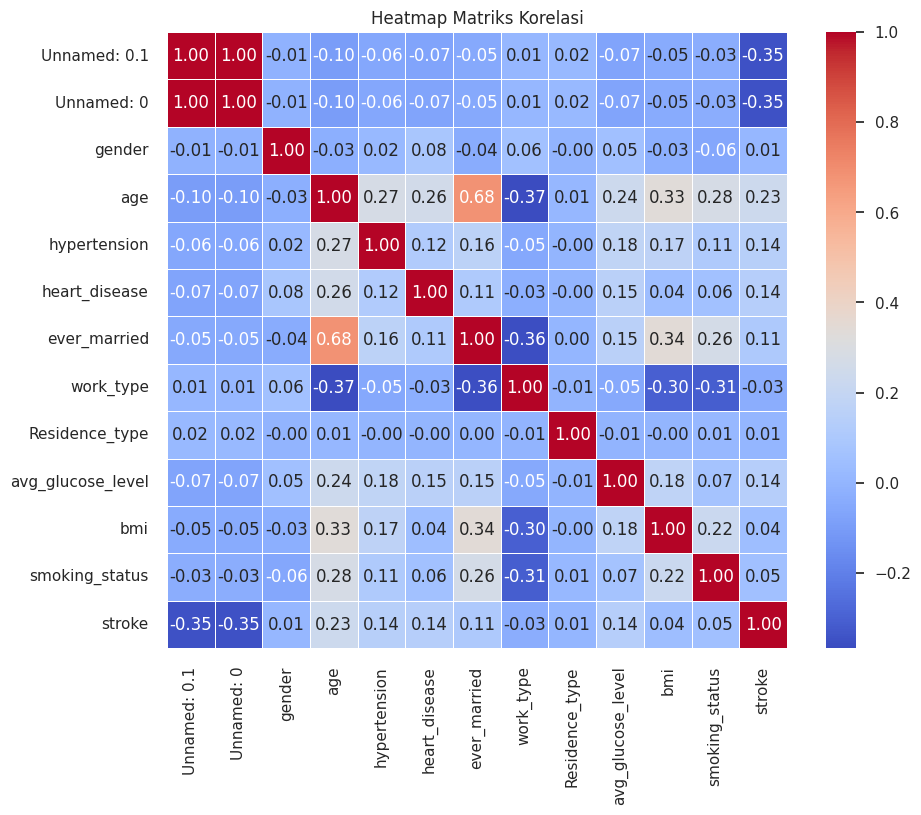

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Matriks Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Menghapus atau Menangani Data Kosong (Missing Values)**

In [116]:
data_cleaned = data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

missing_values = data_cleaned.isnull().sum()
missing_values

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [117]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 421.9 KB


In [118]:
data_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4904,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4905,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4906,1,51.0,0,0,1,2,0,166.29,25.6,1,0


**Menghapus Data Duplikat**

- Tidak ada Data yang terduplikat

**Normalisasi atau Standarisasi Fitur**

- Dikarenakan saya ingin menormalisasikan data kategorikal,jadi proses encoding saya dahulukan



In [119]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [120]:
kolom = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

label_encoder = {col: LabelEncoder() for col in kolom}
for col in kolom:
    data_cleaned[col] = label_encoder[col].fit_transform(data_cleaned[col])

data_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [121]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(data_cleaned[["age", "avg_glucose_level", "bmi"]])
normalized_features

array([[ 1.06993757,  2.77779723,  0.98114481],
       [ 1.64633634,  0.01401584,  0.45908589],
       [ 0.27184695,  1.48426559,  0.70101563],
       ...,
       [-0.34889019, -0.50218118,  0.21715615],
       [ 0.36052369,  1.37305699, -0.41950107],
       [ 0.05015511, -0.45062901, -0.3431022 ]])

**Deteksi dan Penanganan Outlier**

In [122]:
Q1 = data_cleaned['age'].quantile(0.25)
Q3 = data_cleaned['age'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['Kelas_Outlier'] = ((data_cleaned['age'] < lower_bound) |
                                 (data_cleaned['age'] > upper_bound))

In [123]:
Q1 = data_cleaned['avg_glucose_level'].quantile(0.25)
Q3 = data_cleaned['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['Kelas_Outlier'] = ((data_cleaned['avg_glucose_level'] < lower_bound) |
                                 (data_cleaned['avg_glucose_level'] > upper_bound))

In [124]:
Q1 = data_cleaned['bmi'].quantile(0.25)
Q3 = data_cleaned['bmi'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['Kelas_Outlier'] = ((data_cleaned['bmi'] < lower_bound) |
                                 (data_cleaned['bmi'] > upper_bound))

**Bining(Pengelompokan Data)**

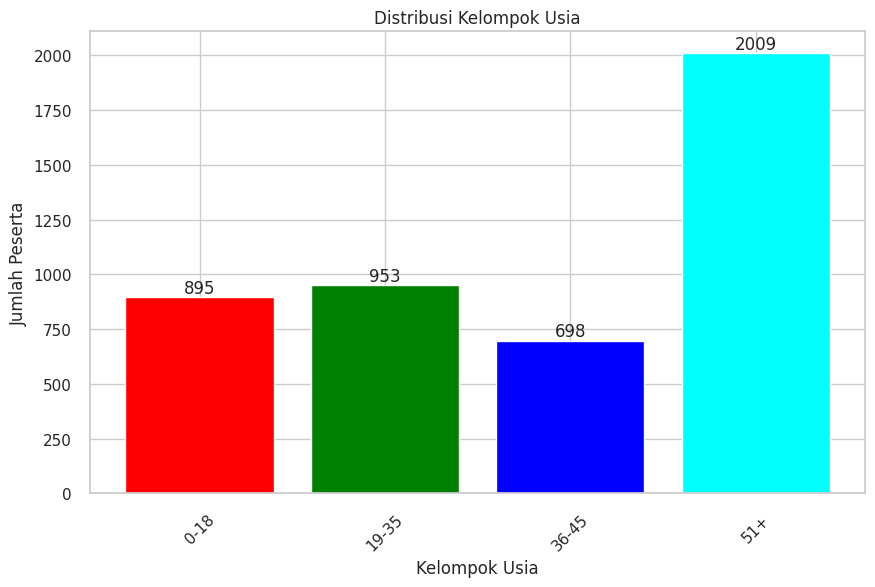

In [125]:
bin_umur = data_cleaned["age"][(data_cleaned["age"] >= 0) & (data_cleaned["age"] <= 18)]
bin_umur1 = data_cleaned["age"][(data_cleaned["age"] >= 19) & (data_cleaned["age"] <= 35)]
bin_umur2 = data_cleaned["age"][(data_cleaned["age"] >= 36) & (data_cleaned["age"] <= 45)]
bin_umur3 = data_cleaned["age"][data_cleaned["age"] >= 51]

umur = ["0-18", "19-35", "36-45", "51+"]
group = [len(bin_umur.values), len(bin_umur1.values), len(bin_umur2.values), len(bin_umur3.values)]

plt.figure(figsize=(10, 6))
plt.bar(umur, group, color=['red', 'green', 'blue', 'cyan'])
plt.title("Distribusi Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Peserta")
plt.xticks(rotation=45)

for i in range(len(umur)):
    plt.text(i, group[i], group[i], ha='center', va='bottom')

plt.show()


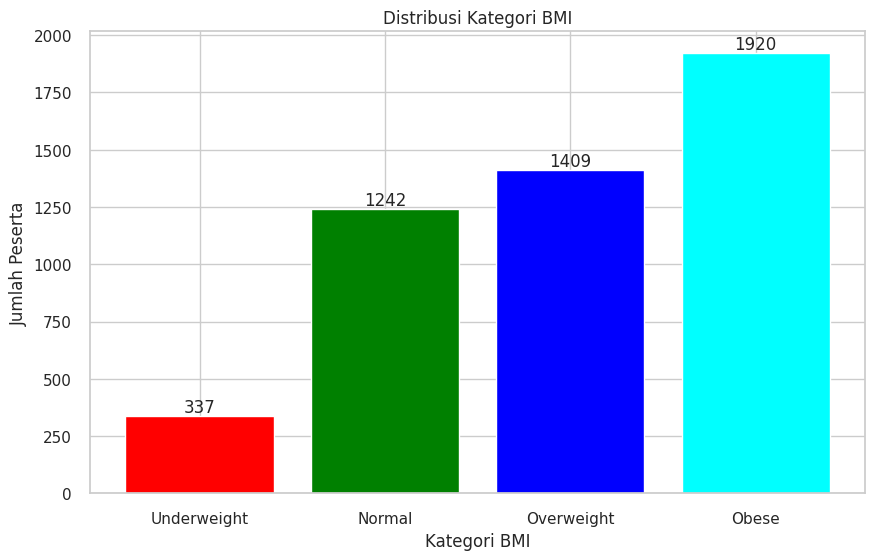

In [126]:
bin_bmi = data_cleaned["bmi"][(data_cleaned["bmi"] < 18.5)]
bin_bmi1 = data_cleaned["bmi"][(data_cleaned["bmi"] >= 18.5) & (data_cleaned["bmi"] <= 24.9)]
bin_bmi2 = data_cleaned["bmi"][(data_cleaned["bmi"] >= 25) & (data_cleaned["bmi"] <= 29.9)]
bin_bmi3 = data_cleaned["bmi"][data_cleaned["bmi"] >= 30]

bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]

count = [len(bin_bmi.values), len(bin_bmi1.values), len(bin_bmi2.values), len(bin_bmi3.values)]

plt.figure(figsize=(10, 6))
plt.bar(bmi_labels, count, color=['red', 'green', 'blue', 'cyan'])
plt.title("Distribusi Kategori BMI")
plt.xlabel("Kategori BMI")
plt.ylabel("Jumlah Peserta")
plt.xticks(rotation=0)

for i in range(len(bmi_labels)):
    plt.text(i, count[i], str(count[i]), ha='center', va='bottom')

plt.show()

In [127]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
 11  Kelas_Outlier      4908 non-null   bool   
dtypes: bool(1), float64(3), int64(8)
memory usage: 426.7 KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [128]:
X = data_cleaned[['age', 'avg_glucose_level', 'bmi']]
kmeans = KMeans( random_state=42)

kmeans.fit(X)

KMeans(random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

**Elbow Method**

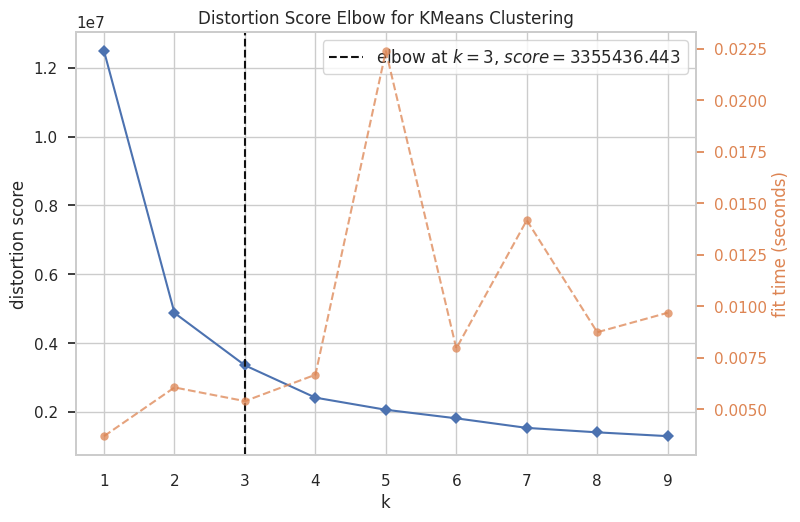

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

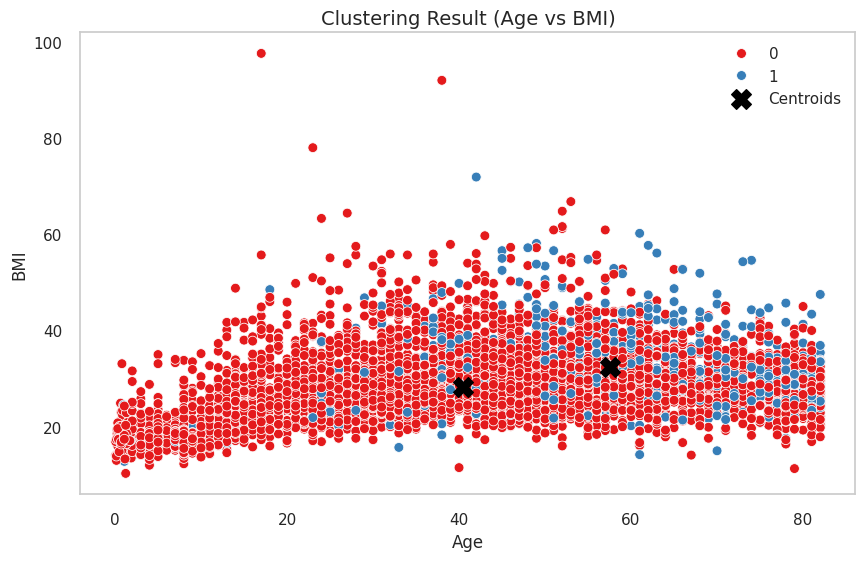

In [130]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

data_cleaned['Cluster'] = kmeans.labels_

centroid = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x="age", y="bmi", hue="Cluster", palette="Set1", s=50)
plt.scatter(centroid[:, 0], centroid[:, 2], c="black", marker="X", s=200, label="Centroids")
plt.title("Clustering Result (Age vs BMI)", fontsize=14)

plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Menghitung Silhoutte score**

In [131]:
silhouette_avg = silhouette_score(X,kmeans.labels_)
silhouette_avg

np.float64(0.639864568517624)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [132]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

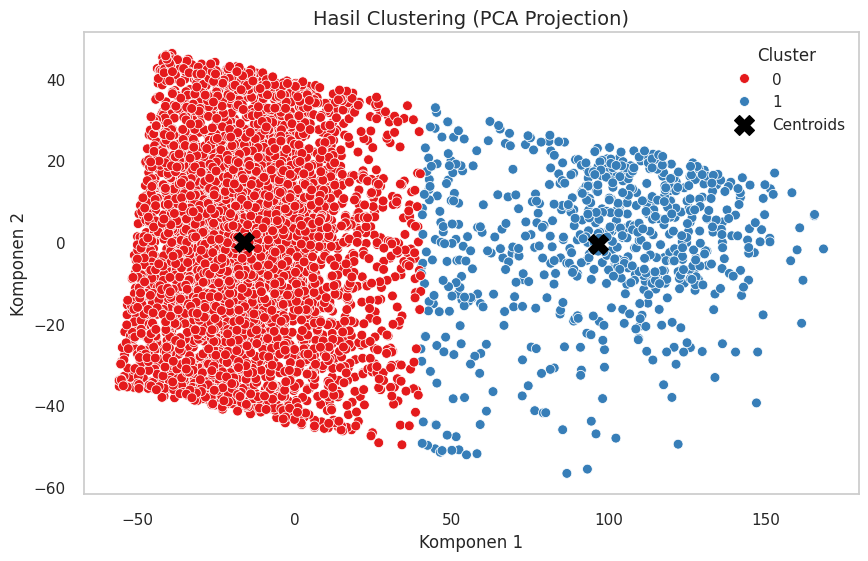

In [133]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Melatih model K-Means dengan 2 klaster pada data hasil PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca.fit(X_pca)

# Visualisasi hasil clustering dengan PCA Projection
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_pca.labels_, palette="Set1", s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            c="black", marker="X", s=200, label="Centroids")
plt.title("Hasil Clustering (PCA Projection)", fontsize=14)
plt.xlabel("Komponen 1")
plt.ylabel("Komponen 2")
plt.legend(loc='upper right', title="Cluster")
plt.grid()
plt.show()

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [134]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   int64  
 5   work_type          4908 non-null   int64  
 6   Residence_type     4908 non-null   int64  
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   int64  
 10  stroke             4908 non-null   int64  
 11  Kelas_Outlier      4908 non-null   bool   
 12  Cluster            4908 non-null   int32  
dtypes: bool(1), float64(3), int32(1), int64(8)
memory usage: 445.9 KB


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Interpretasi Hasil Clustering**

Berdasarkan hasil clustering menggunakan K-Means dengan dua klaster, berikut adalah karakteristik dan interpretasi dari masing-masing cluster:

1. Cluster 0 :

· Umumnya peserta berusia muda

· Memiliki rata-rata kadar glukosa dan BMI yang lebih rendah dibandingkan dengan cluster lain

· Peserta dalam cluster ini Mungkin melakukan gaya hidup lebih aktif atau mungkin tidak memiliki faktor risiko kesehatan yang signifikan;

2. Cluster 1 :

· Berisi peserta dengan usia lebih tua dibandingkan dengan Cluster 0

· Rata-rata kadar glukosa dan BMI lebih tinggi; potensi risiko kesehatan lebih besar

· Bisa jadi peserta dalam cluster ini masalah lebih rentan terhadap masalah kesehatan terkait usia atau gaya hidup

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [135]:
data_cleaned.to_csv("data_cleaned.csv", index=False)